In [1]:
from datasets import SHD_dataloaders, SSC_dataloaders
from config import Config
from snn import SNN
from snn_delays import SnnDelays
import torch
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\n===> Device = {device}")

config = Config()


train_loader, valid_loader= SHD_dataloaders(config)
model = SNN(config).to(device)

print(model)


===> Device = cpu
The directory [../Datasets/SHD/extract] for saving extracted files already exists.
SpikingJelly will not check the data integrity of extracted files.
If extracted files are not integrated, please delete [../Datasets/SHD/extract] manually, then SpikingJelly will re-extract files from [../Datasets/SHD/download].
The directory [../Datasets/SHD/duration_10] already exists.
The directory [../Datasets/SHD/extract] for saving extracted files already exists.
SpikingJelly will not check the data integrity of extracted files.
If extracted files are not integrated, please delete [../Datasets/SHD/extract] manually, then SpikingJelly will re-extract files from [../Datasets/SHD/download].
The directory [../Datasets/SHD/duration_10] already exists.
SNN(
  (model): Sequential(
    (0): Linear(in_features=140, out_features=256, bias=False)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True, step_mode=m)
    (2): LIFNode(
      v_threshold=1.0, v_

In [2]:
model.train_model(train_loader, valid_loader,'.', device)

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: thvnvtos. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/thanatos/.netrc


=====> Epoch 0 : 
Loss Train = 5.903  |  Acc Train = 5.15% 
Loss Valid = 3.393  |  Acc Valid = 5.08%
# Saving best model...
=====> Epoch 1 : 
Loss Train = 4.838  |  Acc Train = 6.61% 
Loss Valid = 2.981  |  Acc Valid = 8.64%
# Saving best model...
=====> Epoch 2 : 
Loss Train = 4.317  |  Acc Train = 8.66% 
Loss Valid = 2.739  |  Acc Valid = 17.48%
# Saving best model...
=====> Epoch 3 : 
Loss Train = 3.835  |  Acc Train = 10.91% 
Loss Valid = 2.535  |  Acc Valid = 23.73%
# Saving best model...
=====> Epoch 4 : 
Loss Train = 3.295  |  Acc Train = 14.87% 
Loss Valid = 2.381  |  Acc Valid = 29.43%
# Saving best model...


Loss = 2.442 | ACC = 27.82
torch.Size([8, 28, 11])
weight = 0.0267
P = 3.0502
SIG = 0.23
Kernel sum = 0.0267

[0.0000000e+00 1.4012985e-45 3.3650500e-34 1.4747511e-24 1.1837762e-16
 1.7403771e-10 4.6863897e-06 2.3112951e-03 2.0878274e-02 3.4542663e-03
 1.0467410e-05]


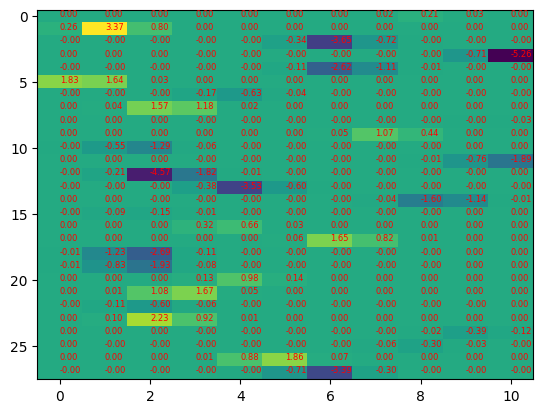

In [3]:
model = SnnDelays(config).to(device)
model.load_state_dict(torch.load(config.save_model_path), strict=False)
model.eval_model(valid_loader, device)
loss, acc = model.eval_model(valid_loader, device)
print(f'Loss = {loss:.3f} | ACC = {100*acc:.2f}')


w = model.blocks[0][0][0].weight
p = model.blocks[0][0][0].P
sig = model.blocks[0][0][0].SIG

kernel = model.blocks[0][0][0].DCK.forward(w, p , sig)

p_ind = p[:,0]

#plt.imshow()

print(kernel.size())
plt.imshow(kernel.detach().numpy()[0], aspect='auto')
for x in range(kernel.detach().numpy().shape[2]):
    for y in range(kernel.detach().numpy().shape[1]):
        plt.text(x, y, f'{10*kernel.detach().numpy()[0,y,x]:.2f}', color="red", fontsize=6)


print(f'weight = {w[0,0,0].item():.4f}')
print(f'P = {p[0,0,0,0].item():.4f}')
print(f'SIG = {sig[0,0,0,0].item():.2f}')
print(f'Kernel sum = {kernel[0,0].detach().numpy().sum():.4f}\n')
print(kernel[0,0].detach().numpy())
#plt.plot(kernel[0,0].detach().numpy())


Loss = 2.457 | ACC = 26.03
torch.Size([8, 28, 11])
weight = 0.0267
P = 3.0000
SIG = 0.23
Kernel sum = 0.0267

[0.0000000e+00 5.6051939e-45 1.1281807e-33 4.0444299e-24 2.6555714e-16
 3.1936012e-10 7.0343754e-06 2.8378696e-03 2.0969177e-02 2.8378696e-03
 7.0343754e-06]


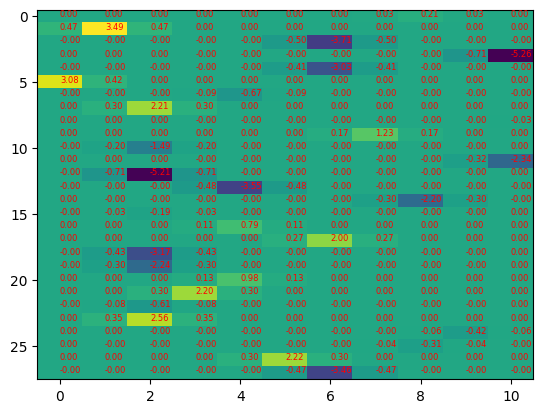

In [4]:
model.round_pos()

loss, acc = model.eval_model(valid_loader, device)
print(f'Loss = {loss:.3f} | ACC = {100*acc:.2f}')


w = model.blocks[0][0][0].weight
p = model.blocks[0][0][0].P
sig = model.blocks[0][0][0].SIG

kernel = model.blocks[0][0][0].DCK.forward(w, p , sig)

p_ind = p[:,0]

#plt.imshow()

print(kernel.size())
plt.imshow(kernel.detach().numpy()[0], aspect='auto')
for x in range(kernel.detach().numpy().shape[2]):
    for y in range(kernel.detach().numpy().shape[1]):
        plt.text(x, y, f'{10*kernel.detach().numpy()[0,y,x]:.2f}', color="red", fontsize=6)


print(f'weight = {w[0,0,0].item():.4f}')
print(f'P = {p[0,0,0,0].item():.4f}')
print(f'SIG = {sig[0,0,0,0].item():.2f}')
print(f'Kernel sum = {kernel[0,0].detach().numpy().sum():.4f}\n')
print(kernel[0,0].detach().numpy())
#plt.plot(kernel[0,0].detach().numpy())


Loss = 0.804 | ACC = 83.22
SIG_shape =  torch.Size([1, 64, 35, 1])
torch.Size([64, 35, 9])
weight = 0.0393
P = -4.0000
SIG = 0.00
Kernel sum = 0.0393

[0.03928481 0.         0.         0.         0.         0.
 0.         0.         0.        ]


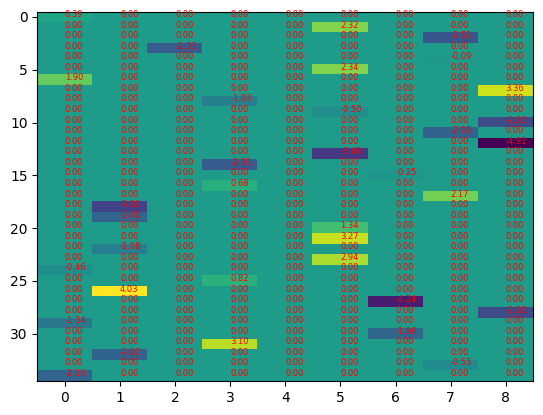

In [9]:
config.DCLSversion = 'max'
model = SnnDelays(config).to(device)
model.load_state_dict(torch.load(config.save_model_path), strict=False)
model.round_pos()

for i in range(len(model.blocks)):
    model.blocks[i][0][0].SIG *= 0 



loss, acc = model.eval_model(valid_loader, device)
print(f'Loss = {loss:.3f} | ACC = {100*acc:.2f}')







w = model.blocks[0][0][0].weight
p = model.blocks[0][0][0].P
sig = model.blocks[0][0][0].SIG
print("SIG_shape = ", sig.size())

kernel = model.blocks[0][0][0].DCK.forward(w, p , sig)

p_ind = p[:,0]

#plt.imshow()

print(kernel.size())
plt.imshow(kernel.detach().numpy()[0], aspect='auto')
for x in range(kernel.detach().numpy().shape[2]):
    for y in range(kernel.detach().numpy().shape[1]):
        plt.text(x, y, f'{10*kernel.detach().numpy()[0,y,x]:.2f}', color="red", fontsize=6)


print(f'weight = {w[0,0,0].item():.4f}')
print(f'P = {p[0,0,0,0].item():.4f}')
print(f'SIG = {sig[0,0,0,0].item():.2f}')
print(f'Kernel sum = {kernel[0,0].detach().numpy().sum():.4f}\n')
print(kernel[0,0].detach().numpy())
#plt.plot(kernel[0,0].detach().numpy())

In [2]:
model.fine_tune(train_loader, valid_loader, '.', device)

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: thvnvtos. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /home/thanatos/.netrc


=====> Epoch 0 : 
Loss Train = 1.446  |  Acc Train = 56.77% 
Loss Valid = 0.837  |  Acc Valid = 82.92%
# Saving best model...
=====> Epoch 1 : 
Loss Train = 1.420  |  Acc Train = 57.95% 
Loss Valid = 0.825  |  Acc Valid = 82.37%
# Saving best model...
=====> Epoch 2 : 
Loss Train = 1.385  |  Acc Train = 58.58% 
Loss Valid = 0.811  |  Acc Valid = 82.09%
# Saving best model...
=====> Epoch 3 : 
Loss Train = 1.352  |  Acc Train = 59.78% 
Loss Valid = 0.772  |  Acc Valid = 82.69%
# Saving best model...
=====> Epoch 4 : 
Loss Train = 1.306  |  Acc Train = 60.90% 
Loss Valid = 0.738  |  Acc Valid = 82.50%
# Saving best model...
=====> Epoch 5 : 
Loss Train = 1.263  |  Acc Train = 62.25% 
Loss Valid = 0.701  |  Acc Valid = 82.97%
# Saving best model...
=====> Epoch 6 : 
Loss Train = 1.224  |  Acc Train = 62.02% 
Loss Valid = 0.677  |  Acc Valid = 83.10%
# Saving best model...
=====> Epoch 7 : 
Loss Train = 1.175  |  Acc Train = 64.49% 
Loss Valid = 0.663  |  Acc Valid = 81.96%
# Saving best m

KeyboardInterrupt: 

SIG_shape =  torch.Size([1, 8, 28, 1])
torch.Size([8, 28, 11])
weight = 0.0267
P = 3.0000
SIG = 0.00
Kernel sum = 0.0267

[0.         0.         0.         0.         0.         0.
 0.         0.         0.02665899 0.         0.        ]


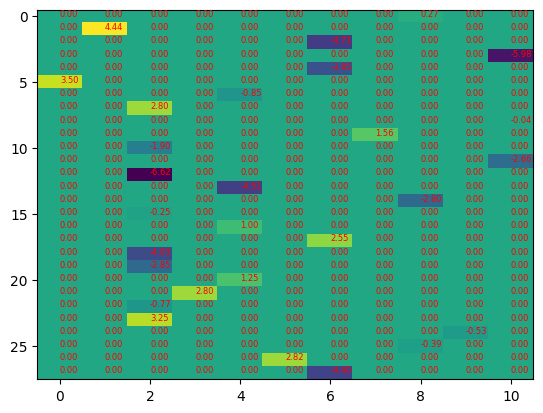

In [3]:
config.DCLSversion = 'max'
model = SnnDelays(config).to(device)
model.load_state_dict(torch.load(config.save_model_path), strict=False)
model.round_pos()

for i in range(len(model.blocks)):
    model.blocks[i][0][0].SIG *= 0 


#loss, acc = model.eval_model(valid_loader, device)
#print(f'Loss = {loss:.3f} | ACC = {100*acc:.2f}')





w = model.blocks[0][0][0].weight
p = model.blocks[0][0][0].P
sig = model.blocks[0][0][0].SIG
print("SIG_shape = ", sig.size())

kernel = model.blocks[0][0][0].DCK.forward(w, p , sig)

p_ind = p[:,0]

#plt.imshow()

print(kernel.size())
plt.imshow(kernel.detach().numpy()[0], aspect='auto')
for x in range(kernel.detach().numpy().shape[2]):
    for y in range(kernel.detach().numpy().shape[1]):
        plt.text(x, y, f'{10*kernel.detach().numpy()[0,y,x]:.2f}', color="red", fontsize=6)


print(f'weight = {w[0,0,0].item():.4f}')
print(f'P = {p[0,0,0,0].item():.4f}')
print(f'SIG = {sig[0,0,0,0].item():.2f}')
print(f'Kernel sum = {kernel[0,0].detach().numpy().sum():.4f}\n')
print(kernel[0,0].detach().numpy())
#plt.plot(kernel[0,0].detach().numpy())

In [4]:
x, y, _ = next(iter(train_loader))
x = x.permute(1,0,2).float().to(device)

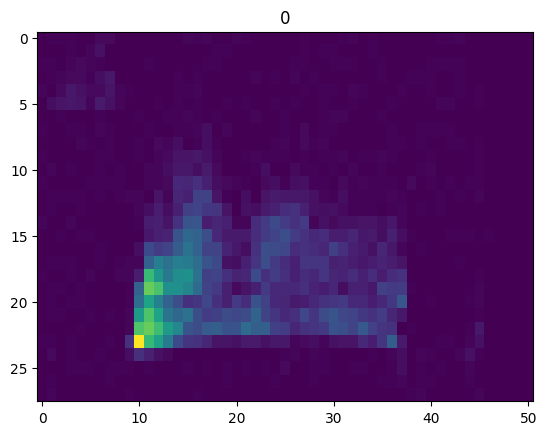

In [5]:
plt.imshow(x[:,0].detach().numpy().T, aspect='auto')
plt.title(y[0].item())
out, v1 = model(x)

torch.Size([66, 32, 20])


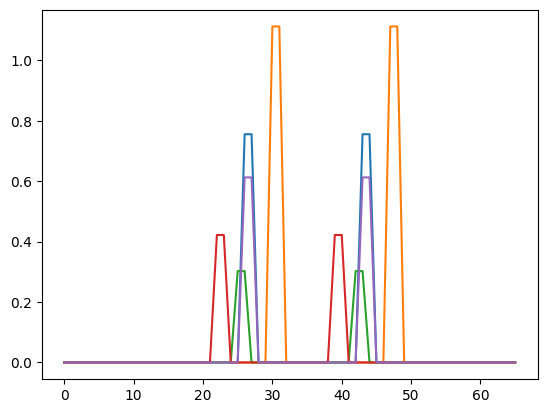

In [6]:
print(out.size())
_ = plt.plot(out[:,0,:5].detach().numpy())#, aspect='auto')

torch.Size([56, 32, 8])


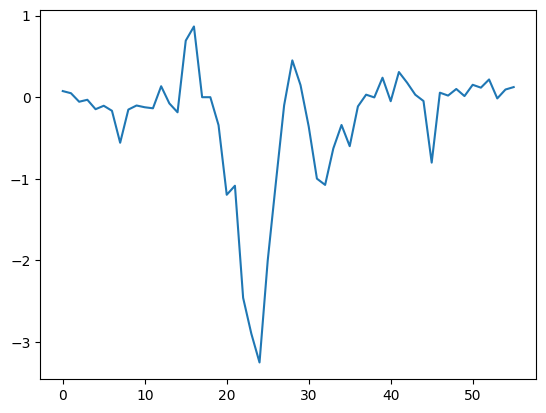

In [10]:
print(v1.size())
_ = plt.plot(v1[:,0,0].detach().numpy())#, aspect='auto')